In [6]:
import pandas as pd

df = pd.read_csv('../data/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.Message,df.Category,test_size=0.2,random_state=42)

In [9]:
x_train

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 4457, dtype: object

In [10]:
y_train

1978    spam
3989     ham
3935     ham
4078     ham
4086    spam
        ... 
3772     ham
5191     ham
5226     ham
5390     ham
860      ham
Name: Category, Length: 4457, dtype: object

In [11]:
x_train[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [12]:
y_train[2]

'spam'

## CountVectorizer

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
x_train_count = v.fit_transform(x_train)
x_test_count = v.transform(x_test)
x_train_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 59275 stored elements and shape (4457, 7701)>

In [14]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4457, 7701))

In [16]:
len(x_train_count.toarray()[1])

7701

In [18]:
v.get_feature_names_out()

array(['00', '000', '000pes', ..., 'zyada', 'èn', 'ú1'],
      shape=(7701,), dtype=object)

In [21]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [22]:
y_pred = model.predict(x_test_count)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



<Axes: >

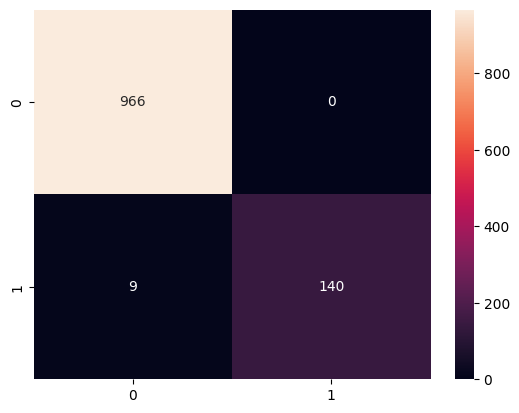

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

import seaborn as sns

sns.heatmap(cm,annot=True,fmt='d')

In [24]:
emails = [
    "SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info",
    "Yeah he got in at 2 and was v apologetic. n had fallen out and she was actin like spoilt child and he got caught up in that. Till 2! But we won't go there! Not doing too badly cheers. You?"
]

emails_count = v.transform(emails) 
model.predict(emails_count)

array(['spam', 'ham'], dtype='<U4')

In [25]:
model.predict_proba(emails_count)

array([[3.84608565e-24, 1.00000000e+00],
       [1.00000000e+00, 1.60637495e-23]])

In [26]:
# Use sklearn pipline

from sklearn.pipeline import Pipeline

pip = Pipeline([
    ('vector',CountVectorizer()),
    ('nb',MultinomialNB())
])

x_train,x_test,y_train,y_test = train_test_split(df.Message,df.Category,test_size=0.2,random_state=42)

pip.fit(x_train,y_train)

y_pred = pip.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

